# Composite systems

The purpose of this numerical experiment is to simulate a composite system made by a BH at the center of a galaxy, which is represented by a Hernquist distribution, and check that if we initialize this system using a suitable DF the system is at equilibrium. We will need to derive the distribution function numerically using the Eddington Formula:

\begin{equation}
    f(\varepsilon) = \frac{1}{\sqrt{8}\pi^2}\frac{\mathrm{d}}{\mathrm{d}\varepsilon}\int^{\varepsilon}_0 \frac{\mathrm{d}\rho}{\mathrm{d}\psi}\frac{\mathrm{d}\psi}{\sqrt{\varepsilon - \psi}}
\end{equation}

I am then supposed to check my result from this [paper](https://arxiv.org/abs/1003.0259).

## Questions

- How do I implement numerical differentiation? (Is the Euler method viable? (Check Boundary conditions))
- How do I implement numerical integration? (Monte Carlo integration?)
- What is the best algorithm to invert $F(\varepsilon$)?

## Plan for the simulation

1. Write $\rho(r)$.

2. Compute 

$$
    P(R) = \frac{M(R)}{M_{tot}} = \int^R_0 \frac{4 \pi r^2}{M_{tot}}\rho (r) dr
$$

I can then invert this and obtain $r(P)$ and sample $P$ to obtain $r$. Convert to cartesian coordinates.

3. Compute $\psi_{tot}$ and then recover $\frac{\mathrm{d}\rho}{\mathrm{d}\psi}$.

4. Compute $\varepsilon_{max}$ which will be the upper limit of integration.

5. Compute an array of numerical solutions of the integral 

$$
    J(\varepsilon) = \int^{\varepsilon}_0 \frac{\mathrm{d}\rho}{\mathrm{d}\psi}\frac{\mathrm{d}\psi}{\sqrt{\varepsilon - \psi}}
$$

for N values of $\varepsilon \in [0, \varepsilon_{max}]$ with a suitable spacing $d\varepsilon$.

6. Differentiate numerically each value of the array, if I decide to use Euler method I can consider $f_{N+1} = 0$.

$$
    f'_n = \frac{f_{n+1}-f_{n}}{d\varepsilon}
$$

7. Check that $f(\varepsilon)$ is monotonically increasing or else the solution is unphysical.

8. Do a cumulative sum of the previous values for each element of the array to obtain the cdf $F(\varepsilon)$.

9. Sample values between 0 and 1 and then find the closer value in the $F(\varepsilon)$, then element with a corresponding index in the $\varepsilon$ array is the value I want.

10. From $\varepsilon$ recover the intial values for the velocities.

11. Simulate.

# Initial conditions

The galaxy is represented by a Hernquist profile.

$$
    \rho_H(r) = \frac{\rho_0}{\frac{r}{a}\left ( 1 + \frac{r}{a} \right )^3}
$$

$$
    M(r) = 4 \pi \rho_0 a^3 \frac{\left (\frac{r}{a} \right )^2}{2\left ( 1 + \frac{r}{a} \right )^2}
$$

$$
    P(r) = \frac{M(r)}{M_{tot}} = \frac{4 \pi \rho_0 a^3}{M_{tot}} \frac{\left (\frac{r}{a} \right )^2}{2\left ( 1 + \frac{r}{a} \right )^2}
$$

We set $a$ a nd $M_{tot}$ to 1. This means that 

$$
    \rho_H(r) = \frac{1}{4 \pi} \frac{1}{r(1 + r)^3}
$$

$$
    M(r) = \frac{r^2}{( 1 + r)^2}
$$

$$
    P(r) = \frac{r^2}{( 1 + r)^2}
$$


By inverting this relation we find 

$$
    r(P) = -\frac{1}{\left( 1 - \frac{1}{\sqrt{P}} \right)}
$$

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import uniform


N = 10000
M = 1
a = 1

In [45]:
cdf_r = uniform.rvs(size = N)  
r = -1/(1-1/np.sqrt(cdf_r))

cdf_theta = uniform.rvs(size = N)
theta = np.arccos(1 - 2 * cdf_theta)

phi = uniform.rvs(0, 2 * np.pi, size = N)

In [46]:
# Change to cartesian coordinates

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta) 

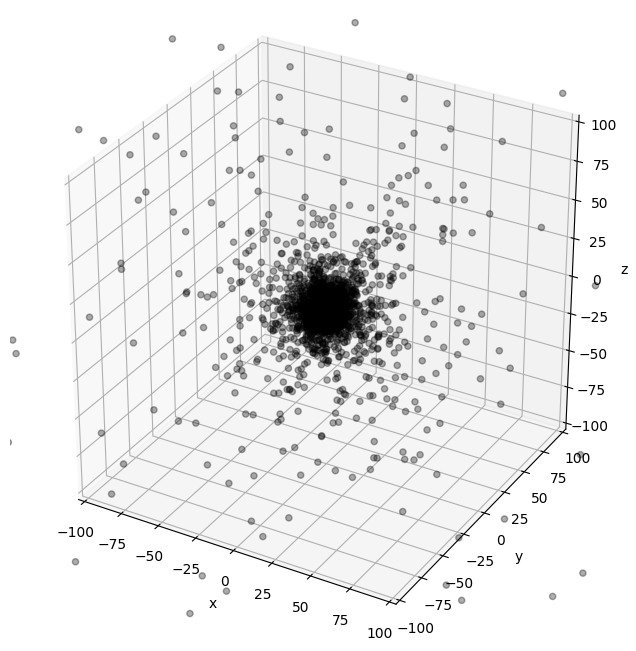

In [52]:
# Plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c = 'black')
ax.axes.set_xlim3d(-100, 100) 
ax.axes.set_ylim3d(-100, 100) 
ax.axes.set_zlim3d(-100, 100) 
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [ ]:
# Check the density profile




\begin{equation}
    \psi_{tot} = \psi_H + \frac{\mu}{r}
\end{equation}

where

\begin{equation}
    \psi_H \propto \frac{1}{2\left ( 1+\frac{r}{a}\right )}
\end{equation}

# Simulation

# Data Analysis